In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [34]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housing_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [35]:
housing_reg_df =  housing_df.copy()
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.centralair, 
                                                            prefix="centralair", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.mszoning, 
                                                            prefix="mszoning", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.bldgtype, 
                                                            prefix="bldgtype", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.exterqual, 
                                                            prefix="exterqual", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.bsmtqual, 
                                                            prefix="bsmtqual", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.salecondition, 
                                                            prefix="salecondition", drop_first=True)], axis=1)

In [36]:
housing_reg_df['totalsf'] = housing_reg_df['totalbsmtsf'] + housing_reg_df['firstflrsf'] + housing_reg_df['secondflrsf']

housing_reg_df['int_over_sf'] = housing_reg_df['totalsf'] * housing_reg_df['overallqual']

# Y is the target variable
Y = np.log1p(housing_reg_df['saleprice'])
# X is the feature set
X = housing_reg_df[['overallqual', 'garagecars','overallqual', 'garagecars', 'totalbsmtsf', 'centralair_Y', 'bldgtype_Duplex',
                     'bldgtype_Twnhs','bldgtype_TwnhsE','exterqual_TA','bsmtqual_Fa','bsmtqual_Gd',
                     'bsmtqual_TA','salecondition_Normal','salecondition_Partial', 'totalsf', 'int_over_sf']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

## Linear Regression Model

In [38]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8450717888846402
-----Test set statistics-----
R-squared of the model in test set is: 0.8478796781400576
Mean absolute error of the prediction is: 0.11677677032493934
Mean squared error of the prediction is: 0.02536540176677137
Root mean squared error of the prediction is: 0.15926519320545646
Mean absolute percentage error of the prediction is: 0.9763495537641544


Text(0, 0.5, 'the target (Y)')

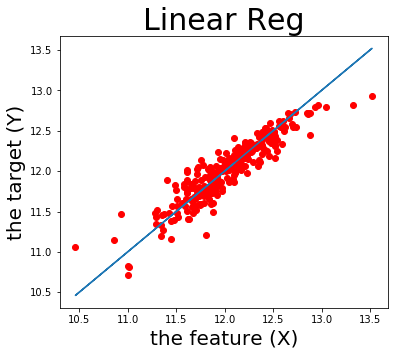

In [39]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_preds_test, color="red")
plt.plot(y_test, y_test)
plt.title("Linear Reg", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)


## Lasso Model

In [40]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train_lasso = lasso_cv.predict(X_train)
y_preds_test_lasso = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_lasso)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_lasso)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8450717888846401
-----Test set statistics-----
R-squared of the model in test set is: 0.8478796779863875
Mean absolute error of the prediction is: 0.11677677035018061
Mean squared error of the prediction is: 0.025365401792395183
Root mean squared error of the prediction is: 0.1592651932859003
Mean absolute percentage error of the prediction is: 0.9763495539990076


Text(0, 0.5, 'the target (Y)')

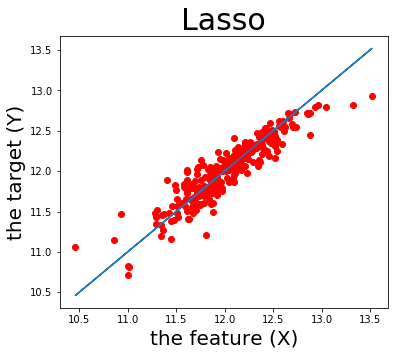

In [41]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_preds_test_lasso, color="red")
plt.plot(y_test, y_test)
plt.title("Lasso", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

## Ridge Regression

In [42]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train_ridge = ridge_cv.predict(X_train)
y_preds_test_ridge = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_ridge)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_ridge)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))


Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8450717888846402
-----Test set statistics-----
R-squared of the model in test set is: 0.8478796781400554
Mean absolute error of the prediction is: 0.11677677032494055
Mean squared error of the prediction is: 0.025365401766771718
Root mean squared error of the prediction is: 0.15926519320545754
Mean absolute percentage error of the prediction is: 0.9763495537641701


Text(0, 0.5, 'the target (Y)')

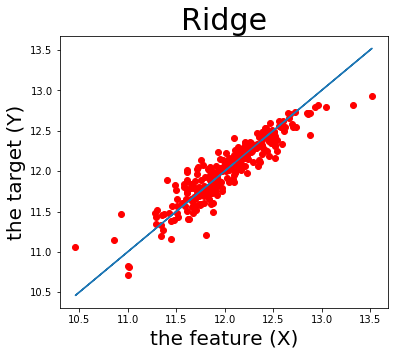

In [43]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_preds_test_ridge, color="red")
plt.plot(y_test, y_test)
plt.title("Ridge", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

## ElasticNet Regression

In [44]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train_net = elasticnet_cv.predict(X_train)
y_preds_test_net = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_net)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_net)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_net)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_net) / y_test)) * 100))

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8450717888846401
-----Test set statistics-----
R-squared of the model in test set is: 0.8478796780540167
Mean absolute error of the prediction is: 0.116776770338287
Mean squared error of the prediction is: 0.02536540178111833
Root mean squared error of the prediction is: 0.15926519325049754
Mean absolute percentage error of the prediction is: 0.9763495538886134


Text(0, 0.5, 'the target (Y)')

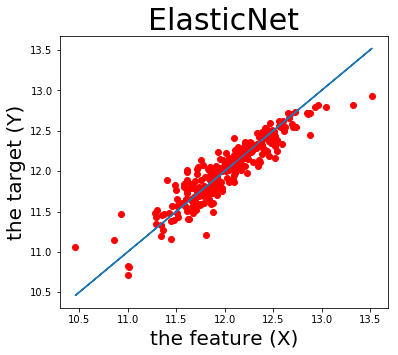

In [45]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_preds_test_net, color="red")
plt.plot(y_test, y_test)
plt.title("ElasticNet", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

In [58]:
metrics = pd.DataFrame()
metrics['Train R'] = (lrm.score(X_train, y_train),lasso_cv.score(X_train, y_train),ridge_cv.score(X_train, y_train),elasticnet_cv.score(X_train, y_train))
metrics['Test R'] = (lrm.score(X_test, y_test), lasso_cv.score(X_test, y_test), ridge_cv.score(X_test, y_test), elasticnet_cv.score(X_test, y_test)) 
metrics['Mean absolute error'] = (mean_absolute_error(y_test, y_preds_test),mean_absolute_error(y_test, y_preds_test_lasso),mean_absolute_error(y_test, y_preds_test_ridge),mean_absolute_error(y_test, y_preds_test_net))
metrics['Mean squared error'] = (mse(y_test, y_preds_test),mse(y_test, y_preds_test_lasso),mse(y_test, y_preds_test_ridge),mse(y_test, y_preds_test_net))
metrics['Root mean squared error'] = (rmse(y_test, y_preds_test),rmse(y_test, y_preds_test_lasso),rmse(y_test, y_preds_test_ridge),rmse(y_test, y_preds_test_net))
metrics['Mean absolute percentage error'] = (np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100,np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100,np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100,np.mean(np.abs((y_test - y_preds_test_net) / y_test)) * 100)


In [63]:
metrics['Train - Test'] = (metrics['Train R'] - metrics['Test R']).abs()

In [64]:
metrics.head()

,Train R,Test R,Mean absolute error,Mean squared error,Root mean squared error,Mean absolute percentage error,Train - Test
0,0.845072,0.84788,0.116777,0.025365,0.159265,0.97635,0.002808
1,0.845072,0.84788,0.116777,0.025365,0.159265,0.97635,0.002808
2,0.845072,0.84788,0.116777,0.025365,0.159265,0.97635,0.002808
3,0.845072,0.84788,0.116777,0.025365,0.159265,0.97635,0.002808


### We see how closely all models performed, in this case there is a smaller difference between the training R value and the test R value in in the OLS model. As such we select OLS prediciton model to most appropriate.